# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

sinasc = pd.read_csv('data/M5_E1_e_M6_E1/SINASC_RO_2019.csv')
sinasc.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráfico de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

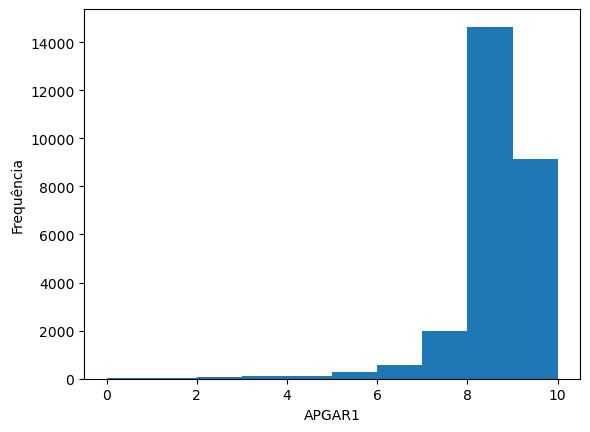

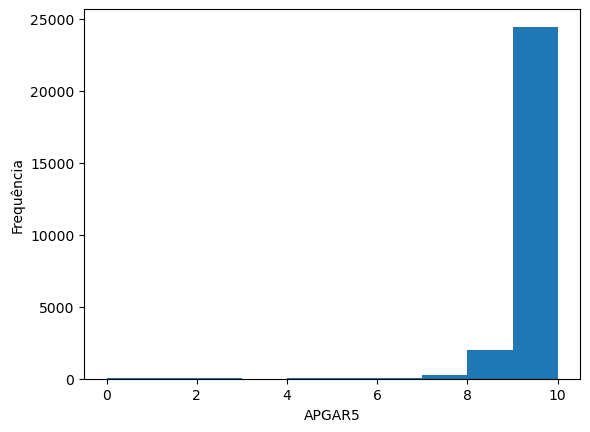

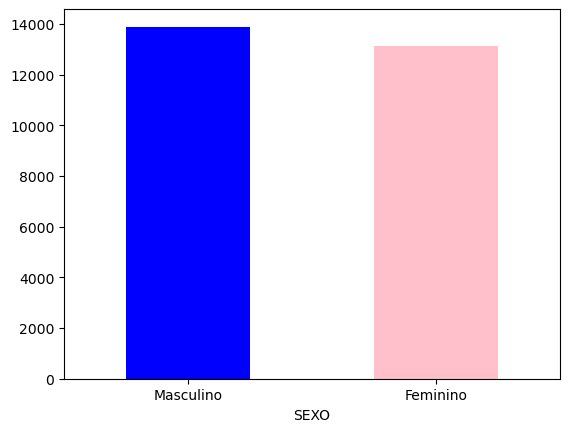

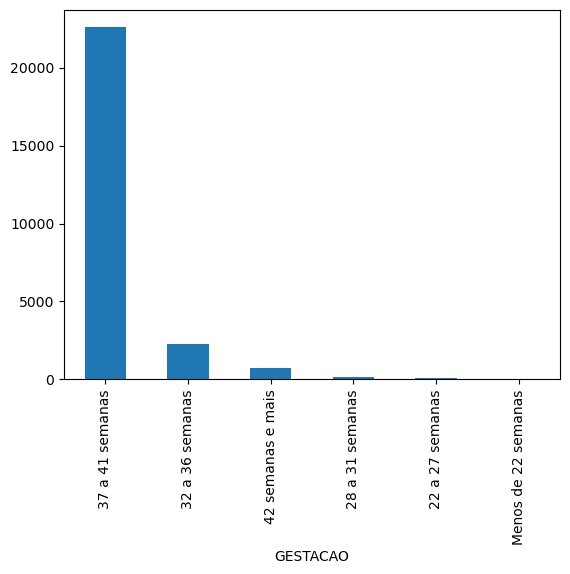

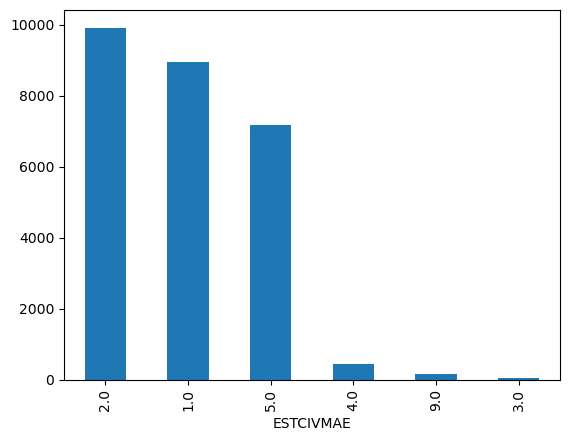

In [84]:
# fazendo histograma para testar

plt.figure()
sinasc['APGAR1'].plot(kind='hist', bins=10)
plt.xlabel('APGAR1')
plt.ylabel('Frequência')
plt.show()

plt.figure()
sinasc['APGAR5'].plot(kind='hist', bins=10)
plt.xlabel('APGAR5')
plt.ylabel('Frequência')
plt.show()

# usando a função de grafico de barras demanda que seja feita uma variável intermediária para guardar a Series com .valuecounts()

plt.figure()
contagem = sinasc['SEXO'].value_counts()
contagem.plot(kind='bar', color=['blue', 'pink'])
plt.xticks(rotation=0)
plt.show()

plt.figure()
contagem = sinasc['GESTACAO'].value_counts()
contagem.plot(kind='bar')
plt.show()

plt.figure()
contagem = sinasc['ESTCIVMAE'].value_counts()
contagem.plot(kind='bar')
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

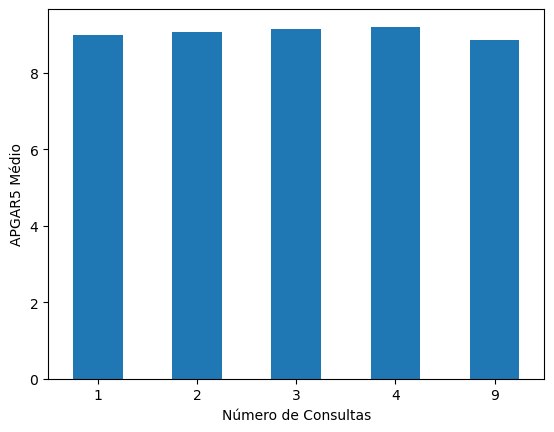

In [85]:
plt.figure()

# Faz a média de apgar5 agrupado por consultas.
# Não fazer a plotagem dessa forma estava gerando uma coluna individual por cada linha
# o que fazia com que a plotagem ficasse ilegível e demorasse bastante para ser executada
apgar5_por_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()

apgar5_por_consultas.plot(kind='bar')


plt.xticks(rotation=0)
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

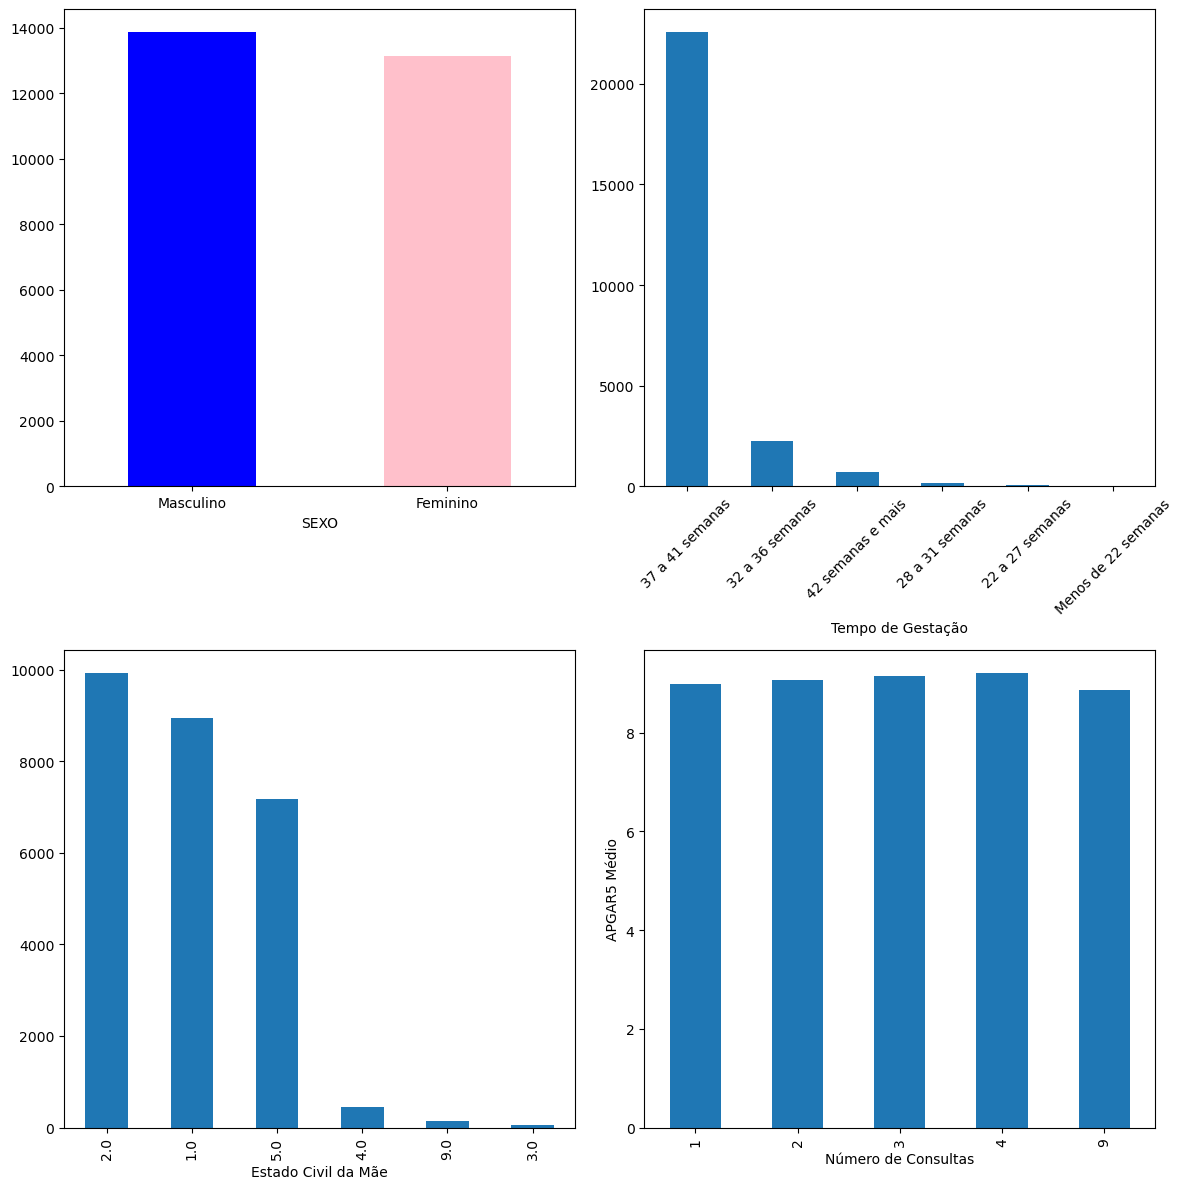

In [86]:
# cria uma figura de 4 eixos, sendo tamanho nrows e ncols = 2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# os parâmetros ax indicam a localização dos gráficos no painel

contagem = sinasc['SEXO'].value_counts()
contagem.plot(kind='bar', color=['blue', 'pink'], ax=ax1)
plt.sca(ax1) # função para 'observar' um dos subplots e poder alterar suas propriedades individualmente
plt.xticks(rotation=0)

contagem = sinasc['GESTACAO'].value_counts()
contagem.plot(kind='bar', xlabel='Tempo de Gestação', ax=ax2)
plt.sca(ax2)
plt.xticks(rotation=45)

contagem = sinasc['ESTCIVMAE'].value_counts()
contagem.plot(kind='bar', xlabel='Estado Civil da Mãe', ax=ax3)

apgar5_por_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()
apgar5_por_consultas.plot(kind='bar', xlabel='Número de Consultas', ylabel='APGAR5 Médio', ax=ax4)

# tight_layout faz com que os textos dos eixos dos graficos não sejam sobrepostos por gráficos ao lado
plt.tight_layout()
plt.show()